NIM : 211351025<br>
NAMA : ARIF RAHMAN HAKIM<br>
KELAS : PAGI A

#Import Dataset Kaggle

#Import Library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori
import plotly.express as px

#Data Discovery

In [2]:
data = pd.read_excel("online_retail_II.xlsx")
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format="%d-%m-%Y %H:%M")

In [4]:
data["InvoiceDate"].dtype

dtype('<M8[ns]')

In [5]:
data["month"] = data['InvoiceDate'].dt.month
data["day"] = data['InvoiceDate'].dt.weekday
data["hour"] = data['InvoiceDate'].dt.hour
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,month,day,hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12,1,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,1,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,1,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12,1,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12,1,7


#EDA

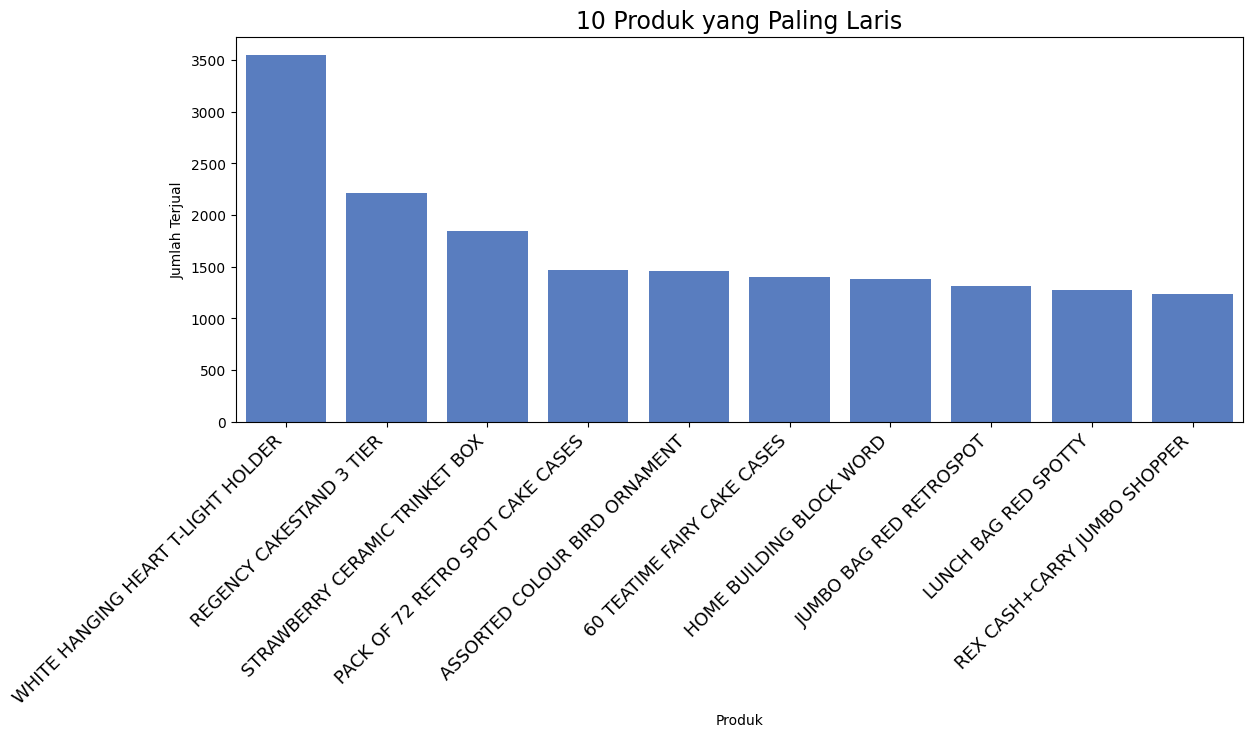

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 5))
sns.set_palette("muted")

sns.barplot(x=data["Description"].value_counts()[:10].index,
            y=data["Description"].value_counts()[:10].values)

plt.xlabel("Produk")
plt.ylabel("Jumlah Terjual")
plt.xticks(rotation=45, ha="right", size=13)
plt.title('10 Produk yang Paling Laris', size=17)
plt.show()

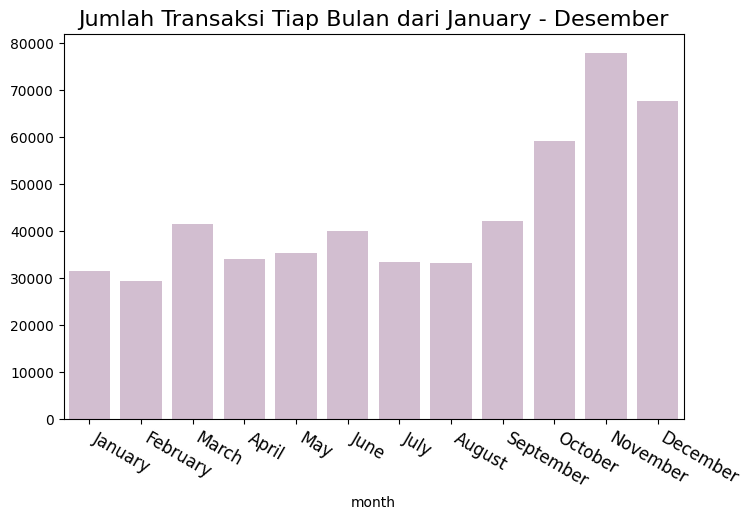

In [7]:
data['month'] = data['InvoiceDate'].dt.month_name()
data_perbulan = data.groupby('month')['Invoice'].count()

# Sorting data_perbulan agar urut sesuai bulan
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
data_perbulan = data_perbulan.reindex(months_order, axis=0)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=data_perbulan.index,
    y=data_perbulan.values,
    color="#D5BBD3"
)
plt.xticks(size=12, rotation=-30, ha="left")
plt.title("Jumlah Transaksi Tiap Bulan dari January - Desember", size=16)
plt.show()


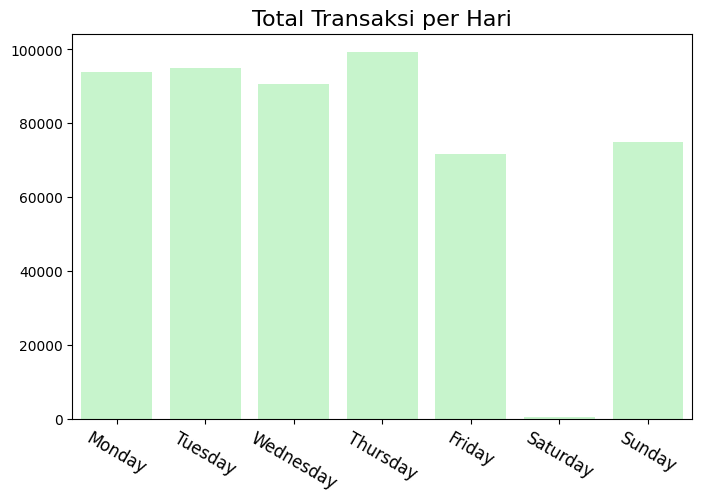

In [8]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
data_perday = data.groupby('DayOfWeek')['Invoice'].count()

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
data_perday = data_perday.reindex(days_order, axis=0)


plt.figure(figsize=(8, 5))
sns.barplot(
    x=days_order,
    y=data_perday.values,
    color="#BFFCC6"
)
plt.xticks(size=12, rotation=-30)
plt.title("Total Transaksi per Hari", size=16)
plt.show()


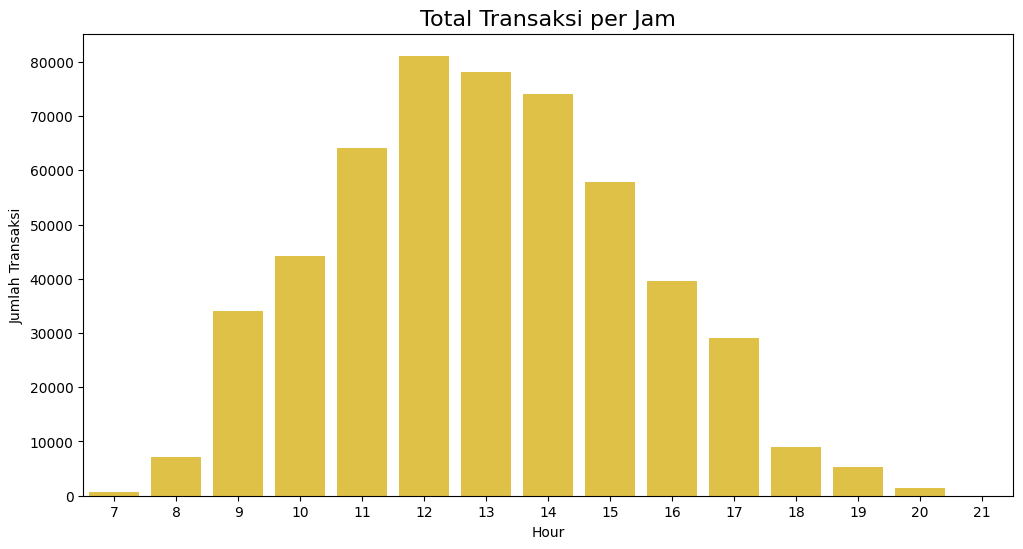

In [9]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Hour'] = data['InvoiceDate'].dt.hour
data_perhour = data.groupby('Hour')['Invoice'].count()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=data_perhour.index,
    y=data_perhour.values,
    color="#FAD02E"
)
plt.xlabel("Hour")
plt.ylabel("Jumlah Transaksi")
plt.title("Total Transaksi per Jam", size=16)
plt.show()


In [10]:
grouped_data = data.groupby('Country')['Price'].sum().reset_index()

top_countries = grouped_data.nlargest(20, 'Price')

fig = px.pie(top_countries, values='Price', names='Country', title='20 NEGARA TERBAIK TERBAIK BERDASARKAN PENJUALAN')
fig.show()


In [11]:
px.bar(data[['InvoiceDate','Price']].set_index('InvoiceDate').resample('W').sum().reset_index(),
       x='InvoiceDate', y='Price')

#DATA PREPARATION

In [12]:
data['Description'] = data['Description'].apply(lambda x: str(x).lower() if pd.notna(x) else x)

In [13]:
data['Description'] = data['Description'].apply(lambda x: str(x).strip() if pd.notna(x) else x)

In [14]:
data = data[["Invoice", "Description"]].copy()
data.head(10)

,Invoice,Description
0,489434,15cm christmas glass ball 20 lights
1,489434,pink cherry lights
2,489434,white cherry lights
3,489434,"record frame 7"" single size"
4,489434,strawberry ceramic trinket box
5,489434,pink doughnut trinket pot
6,489434,save the planet mug
7,489434,fancy font home sweet home doormat
8,489435,cat bowl
9,489435,"dog bowl , chasing ball design"


In [15]:
item_count = data.groupby(["Invoice", "Description"])["Description"].count().reset_index(name="Count")
item_count.head(10)

,Invoice,Description,Count
0,489434,15cm christmas glass ball 20 lights,1
1,489434,fancy font home sweet home doormat,1
2,489434,pink cherry lights,1
3,489434,pink doughnut trinket pot,1
4,489434,"record frame 7"" single size",1
5,489434,save the planet mug,1
6,489434,strawberry ceramic trinket box,1
7,489434,white cherry lights,1
8,489435,cat bowl,1
9,489435,"dog bowl , chasing ball design",1


In [16]:
item_count_pivot = item_count.pivot_table(index='Invoice', columns='Description', values='Count', aggfunc='sum').fillna(0)
print("Ukuran Dataset:", item_count_pivot.shape)
item_count_pivot.head()

Ukuran Dataset: (25888, 4633)


Description,*boombox ipod classic,*usb office glitter lamp,*usb office mirror ball,10 colour spaceboy pen,11 pc ceramic tea set polkadot,12 ass zinc christmas decorations,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 ivory rose peg place settings,...,zinc heart lattice charger large,zinc heart lattice charger small,zinc heart lattice double planter,zinc heart lattice planter bowl,zinc heart lattice t-light holder,zinc heart lattice tray oval,zinc metal heart decoration,zinc police box lantern,zinc top 2 door wooden shelf,zinc willie winkie candle stick
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head()

Description,*boombox ipod classic,*usb office glitter lamp,*usb office mirror ball,10 colour spaceboy pen,11 pc ceramic tea set polkadot,12 ass zinc christmas decorations,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 ivory rose peg place settings,...,zinc heart lattice charger large,zinc heart lattice charger small,zinc heart lattice double planter,zinc heart lattice planter bowl,zinc heart lattice t-light holder,zinc heart lattice tray oval,zinc metal heart decoration,zinc police box lantern,zinc top 2 door wooden shelf,zinc willie winkie candle stick
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
def encode(x):
  if x <=0:
    return 0
  elif x >= 1:
    return 1
item_count_pivot = item_count_pivot.applymap(encode)
item_count_pivot.head()

C:\Users\musya\AppData\Local\Temp\ipykernel_20008\512023677.py:6: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Description,*boombox ipod classic,*usb office glitter lamp,*usb office mirror ball,10 colour spaceboy pen,11 pc ceramic tea set polkadot,12 ass zinc christmas decorations,12 coloured party balloons,12 daisy pegs in wood box,12 egg house painted wood,12 ivory rose peg place settings,...,zinc heart lattice charger large,zinc heart lattice charger small,zinc heart lattice double planter,zinc heart lattice planter bowl,zinc heart lattice t-light holder,zinc heart lattice tray oval,zinc metal heart decoration,zinc police box lantern,zinc top 2 door wooden shelf,zinc willie winkie candle stick
Invoice,,,,,,,,,,,,,,,,,,,,,
489434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
489438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
print("Ukuran dataset :", item_count_pivot.shape)
print("Jumlah transaksi :", item_count_pivot.shape[0])
print("Jumlah item :", item_count_pivot.shape[1])

Ukuran dataset : (25888, 4633)
Jumlah transaksi : 25888
Jumlah item : 4633


#MODELING

In [20]:
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [21]:
support = 0.02
frequent_items = apriori(item_count_pivot, min_support= support, use_colnames=True)
frequent_items.sort_values("support", ascending=False).head(10)

c:\Users\musya\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
141,0.131683,(white hanging heart t-light holder)
112,0.084441,(regency cakestand 3 tier)
131,0.068256,(strawberry ceramic trinket box)
4,0.054852,(assorted colour bird ornament)
83,0.054813,(pack of 72 retro spot cake cases)
1,0.051839,(60 teatime fairy cake cases)
43,0.051800,(home building block word)
51,0.049328,(jumbo bag red retrospot)
69,0.048130,(lunch bag red spotty)
60,0.046238,(jumbo storage bag suki)


In [22]:
metric = "lift"
min_threshold = 1

rules = association_rules(frequent_items, metric=metric, min_threshold=min_threshold)[["antecedents", "consequents", "support", "confidence", "lift"]]
rules.sort_values('confidence', ascending=False, inplace=True)
rules.head(15)

,antecedents,consequents,support,confidence,lift
12,(sweetheart ceramic trinket box),(strawberry ceramic trinket box),0.031598,0.782775,11.468298
10,(red hanging heart t-light holder),(white hanging heart t-light holder),0.030130,0.716912,5.444239
18,(wooden picture frame white finish),(wooden frame antique white),0.023524,0.635036,14.160056
7,(love building block word),(home building block word),0.022675,0.532185,10.273828
4,(heart of wicker small),(heart of wicker large),0.021323,0.531792,12.492767
19,(wooden frame antique white),(wooden picture frame white finish),0.023524,0.524548,14.160056
1,(pack of 60 pink paisley cake cases),(60 teatime fairy cake cases),0.022984,0.512931,9.894753
5,(heart of wicker large),(heart of wicker small),0.021323,0.500907,12.492767
13,(strawberry ceramic trinket box),(sweetheart ceramic trinket box),0.031598,0.462932,11.468298
16,(wooden frame antique white),(white hanging heart t-light holder),0.020666,0.460810,3.499396


#VISUALISASI HASIL MODELING

C:\Users\musya\AppData\Local\Temp\ipykernel_20008\2393403336.py:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



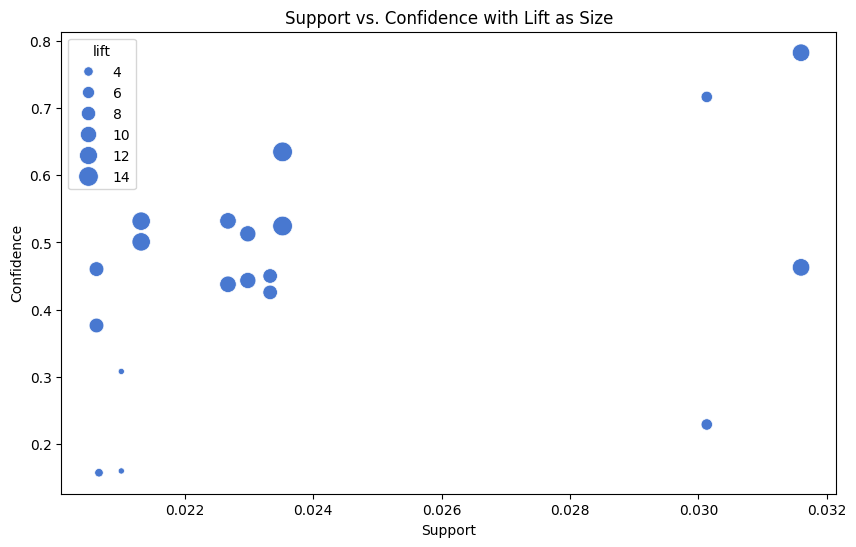

C:\Users\musya\AppData\Local\Temp\ipykernel_20008\2393403336.py:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



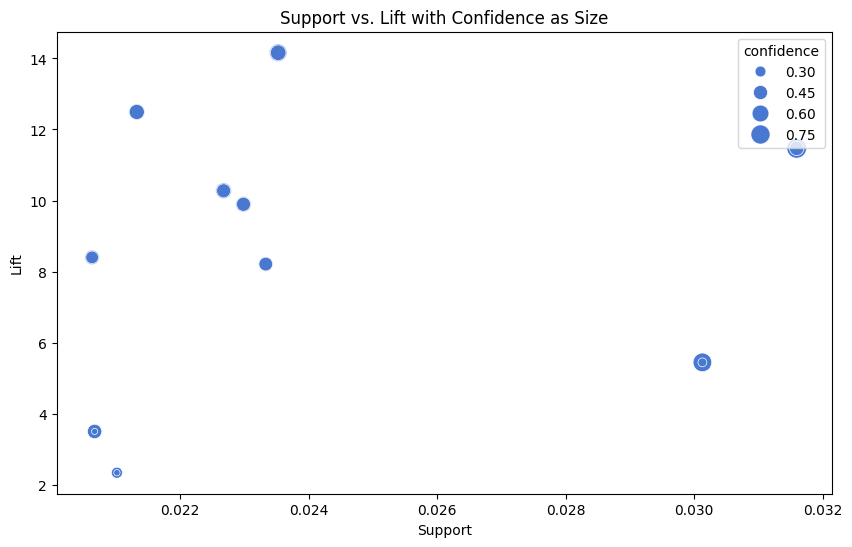

C:\Users\musya\AppData\Local\Temp\ipykernel_20008\2393403336.py:22: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



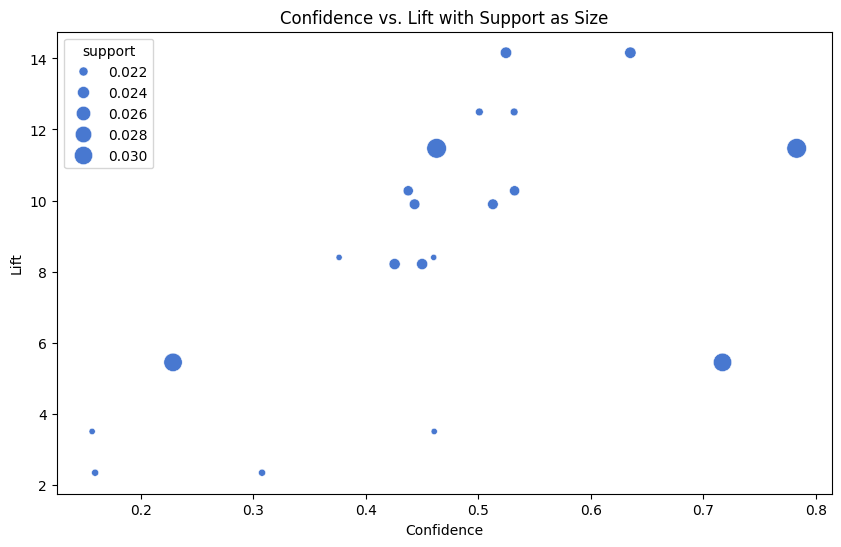

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of support vs. confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="confidence", data=rules, size="lift", sizes=(20, 200), palette="viridis")
plt.title("Support vs. Confidence with Lift as Size")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

# Scatter plot of support vs. lift
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support", y="lift", data=rules, size="confidence", sizes=(20, 200), palette="magma")
plt.title("Support vs. Lift with Confidence as Size")
plt.xlabel("Support")
plt.ylabel("Lift")
plt.show()

# Scatter plot of confidence vs. lift
plt.figure(figsize=(10, 6))
sns.scatterplot(x="confidence", y="lift", data=rules, size="support", sizes=(20, 200), palette="plasma")
plt.title("Confidence vs. Lift with Support as Size")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.show()


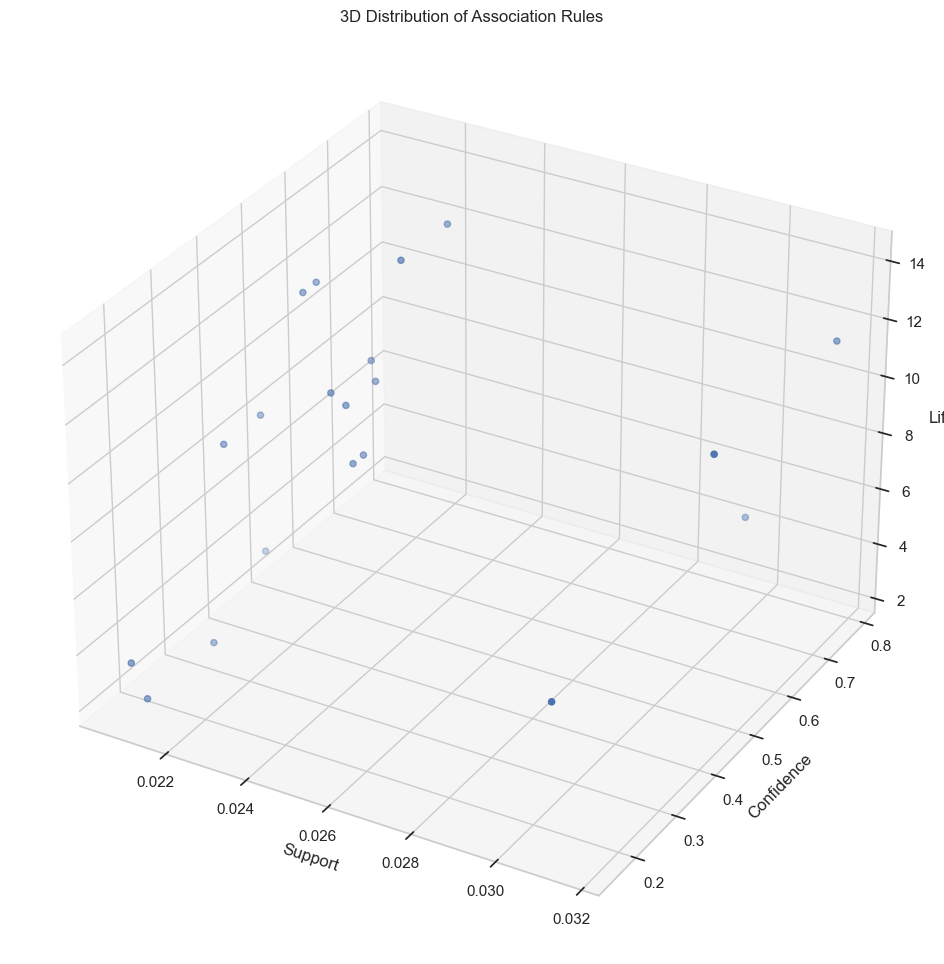

In [24]:
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Invoice      525461 non-null  object
 1   Description  522533 non-null  object
dtypes: object(2)
memory usage: 8.0+ MB
